In [1]:
# Importing the neccessary packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Reading the data

df=pd.read_csv("C:/Users/16478/Downloads/movies.csv")

In [3]:
# First few rows of the dataset

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Finding any null values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Top 5 movies with the highest scores.

df[['name','score']].sort_values(by=['score'],ascending=False).head()

,name,score
2443,The Shawshank Redemption,9.3
5243,The Dark Knight,9.0
2247,Schindler's List,8.9
2444,Pulp Fiction,8.9
4245,The Lord of the Rings: The Return of the King,8.9


In [7]:
# Top 5 movies with the highest budget.

df[['name','budget']].sort_values(by=['budget'],ascending=False).head()

,name,budget
7445,Avengers: Endgame,356000000.0
7244,Avengers: Infinity War,321000000.0
7075,Star Wars: Episode VIII - The Last Jedi,317000000.0
7066,Justice League,300000000.0
5060,Pirates of the Caribbean: at World's End,300000000.0


In [8]:
# Top 5 movies with the highest gross revenue.

df[['name','gross']].sort_values(by=['gross'],ascending=False).head()

,name,gross
5445,Avatar,2.847246e+09
7445,Avengers: Endgame,2.797501e+09
3045,Titanic,2.201647e+09
6663,Star Wars: Episode VII - The Force Awakens,2.069522e+09
7244,Avengers: Infinity War,2.048360e+09


<AxesSubplot:xlabel='budget', ylabel='gross'>

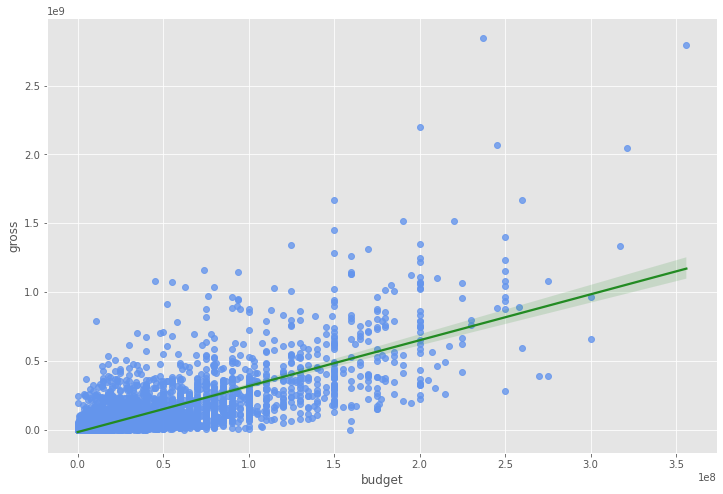

In [19]:
# Relationship between the budget and the gross revenue in the form of a scatterplot.

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"cornflowerblue"},line_kws={"color":"forestgreen"})

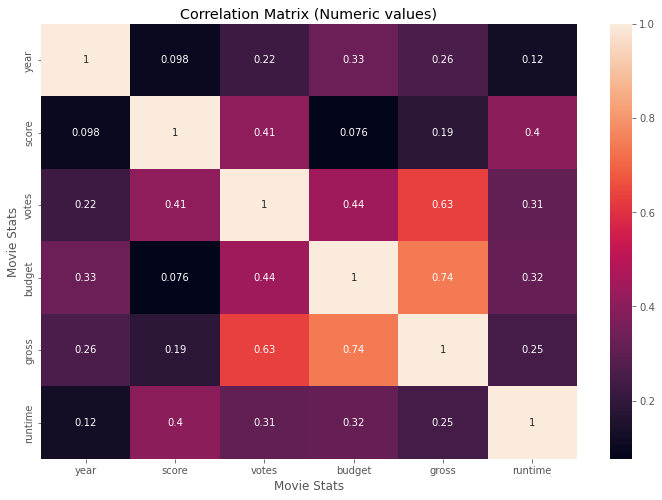

In [10]:
# Correlation between various stats of the movies (numeric values) in the form of a correlation matrix.

corr_matrix=df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)

plt.title("Correlation Matrix (Numeric values)")

plt.xlabel("Movie Stats")

plt.ylabel("Movie Stats")

plt.show()

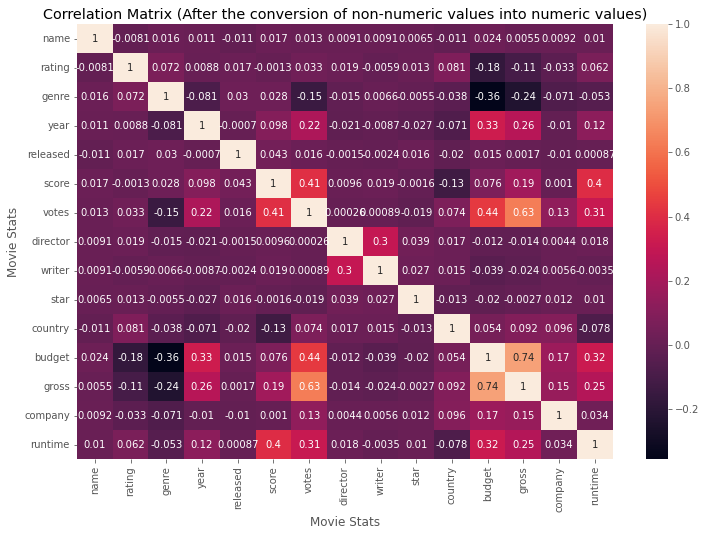

In [11]:
# Conversion of non-numeric values into numeric values to correlate every stats of a movie.

# Correlation between various stats of the movies in the form of a correlation matrix.

df_num=df

for col in df_num.columns:
    if df_num[col].dtype=='object':
        df_num[col]=df_num[col].astype('category')
        df_num[col]=df_num[col].cat.codes
        
corr_matrix=df_num.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)

plt.title("Correlation Matrix (After the conversion of non-numeric values into numeric values)")

plt.xlabel("Movie Stats")

plt.ylabel("Movie Stats")

plt.show()